In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = plt.imread("104883_sat.jpg",cv2.IMREAD_GRAYSCALE)

In [13]:
img.shape

(1024, 1024, 3)

## Given 

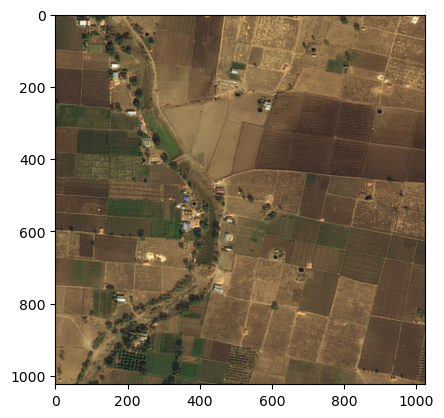

In [3]:
plt.imshow(img, cmap='gray')

## Target Mask

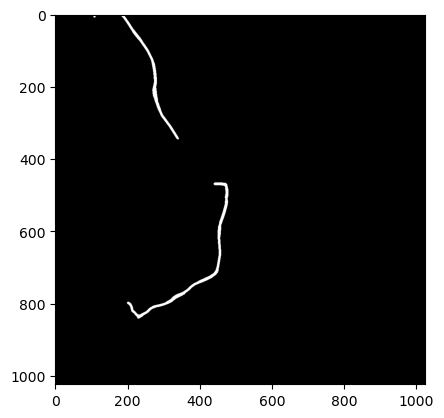

In [7]:
masked_img = cv2.imread("104883_mask.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(masked_img,cmap='gray')

In [58]:
cv2.Canny?

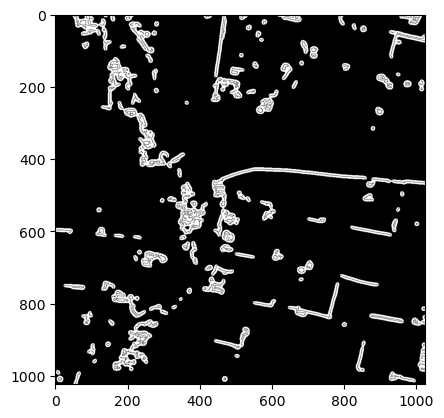

In [140]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_blur = cv2.GaussianBlur(gray, (5,5),0)

edges = cv2.Canny(img_blur,100,200)

img_adapt = cv2.adaptiveThreshold(edges, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 10)
img_adapt = cv2.bitwise_not(img_adapt)
plt.imshow(img_adapt,cmap='gray')

In [141]:
kernel = np.ones((1, 1), np.uint8)
img_dilate = cv2.dilate(img_adapt,kernel)

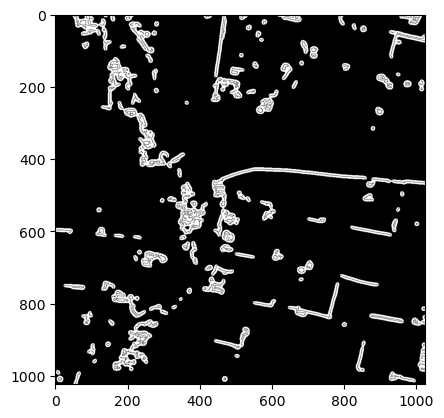

In [142]:
plt.imshow(img_dilate,cmap='gray')

In [172]:
# for i in range (1024):
#     for j in range (1024):
#         if j>=400:
#             img_dilate[i][j]=0
#         elif j<=100:
#             img_dilate[i][j]=0
        
#         elif i>900:
#             img_dilate[i][j]=0
        
#         elif (i>0 and i<200) and (j>220 and j<300):
#             img_dilate[i][j]=0


In [179]:
img_erosion = cv2.erode(img_dilate, np.ones((10,10)), iterations=1)  

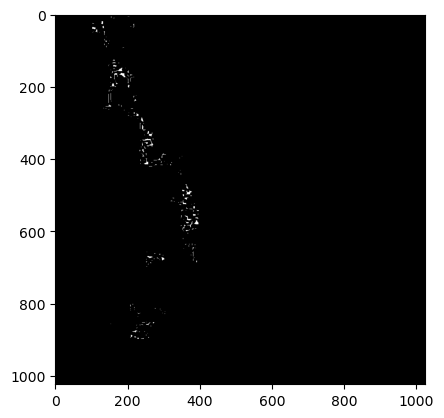

In [181]:
plt.imshow(img_erosion,cmap='gray')

In [174]:
kernel = np.ones((5,5), np.uint8)  

In [211]:
img_dilation = cv2.dilate(img_erosion, kernel, iterations=2)  

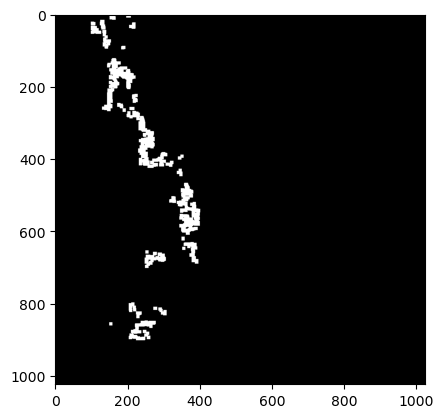

In [212]:
plt.imshow(img_dilation,cmap='gray')

In [221]:
temp_img = cv2.erode(img_dilation,np.ones((5,5)),iterations=2)

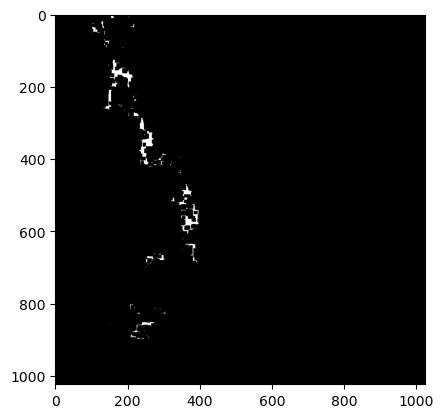

In [223]:
plt.imshow(temp_img,cmap='gray')

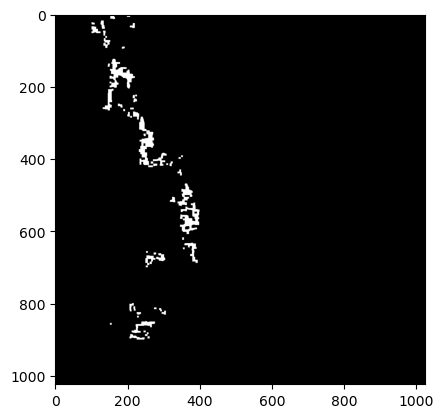

In [224]:
pred_mask = cv2.dilate(temp_img,np.ones((3,3)),iterations=2)
plt.imshow(pred_mask,cmap='gray')

## PSNR 

In [225]:

from math import log10, sqrt 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [226]:
PSNR(masked_img,pred_mask)

64.79206873561722

## SSIM 

In [227]:
from skimage import metrics

In [228]:
ssim = metrics.structural_similarity(masked_img, pred_mask, full=True)

In [229]:
ssim[0]

0.9567746946201311

### NRMSE 

In [230]:
metrics.normalized_root_mse(masked_img,pred_mask)

1.71514866586742

Text(0.5, 1.0, 'Processed Mask')

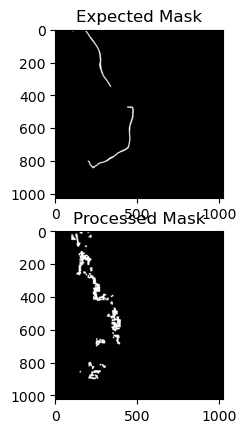

In [231]:


plt.subplot(211)
plt.imshow(masked_img,cmap='gray')
plt.title("Expected Mask")

plt.subplot(212)
plt.imshow(img_dilation,cmap='gray')
plt.title("Processed Mask")